# Some examples using keras in a simple regression

This notebook show how to create a simple neural network in a regression problem

In [1]:
#Import libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import sklearn.preprocessing as prep
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


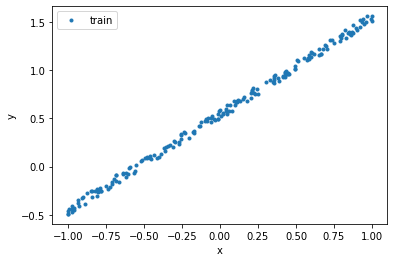

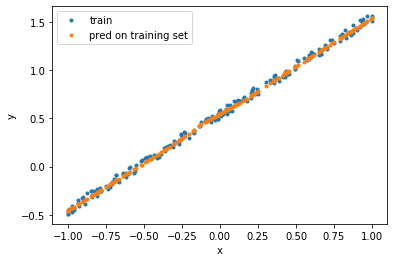

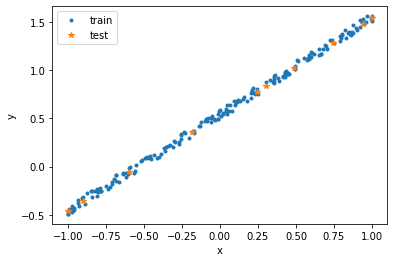

In [2]:
# Generate dummy data
a,b = 1,0.5

np.random.seed(230189)

# training set
x_train = np.random.random((200, 1))
scaler = prep.MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(x_train)
x_train = scaler.transform(x_train)

y_train = a*x_train+b+0.1*np.random.random((200, 1))

#Testing set
x_test = np.random.random((10, 1))
scaler = prep.MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(x_test)
x_test = scaler.transform(x_test)


plt.plot(x_train,y_train,'.', label = 'train')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


def baseline_model():
    model = Sequential()                                   #instantiating object Sequential
    model.add(Dense(64, activation='relu', input_dim=1))   #Add layer with 64 neurons
    #model.add(Dense(64, activation='relu', input_dim=1))  #Add layer
    model.add(Dense(1, activation='linear'))               #Adding output layer 
    optimizer = RMSprop(0.001)                             # Options: 'sgd', 'adam'
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model1 = baseline_model()

model1.fit(x_train, y_train, epochs=40, verbose=0, validation_split=0.3)


y = model1.predict(x_train)

plt.figure()
plt.plot(x_train,y_train,'.', label='train')
plt.plot(x_train, y , '.', label = 'pred on training set')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
plt.close()

y_test = model1.predict(x_test)
plt.figure()
plt.plot(x_train,y_train,'.', label='train')
plt.plot(x_test, y_test , '*', label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.close()




Input variables must be normalized , probably to make gradient descendent more equaly scaled in 
different directions (?) 

### Notes about optimizers*
-Stochastic gradient descent optimizer 'sgd' :
    
It replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data)
    
-adam 'adam':

ADAM is in reality a SGD algorithm in which the gradient used in each iteration is updated from the previous using a technique based in momenta. In the momentum method (see the SGD page in wikipedia already mentioned), the update is instead a linear combination of the current stochastic gradient and the previous update.

RMSprop:
RMSprop is a way to accelerate the learning process by penalizing the update of those neural network parameters that make the estimate of the cost function oscillate too much.
The basic idea is that if there is one parameter in the neural network that makes the estimate of the cost function J oscillate a lot, you want to penalize the update of this parameter during optimization, so to avoid the gradient descent algorithm adapt too quickly to changes in this parameter, as compared to the others.

https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/


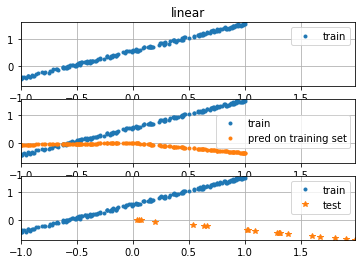

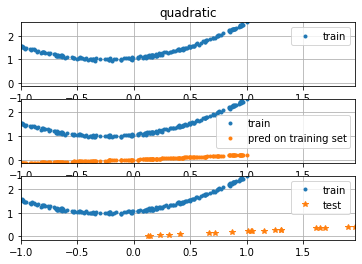

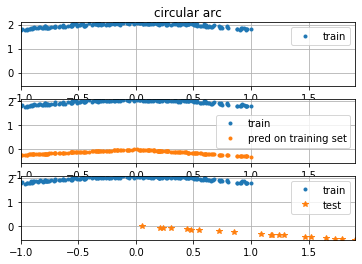

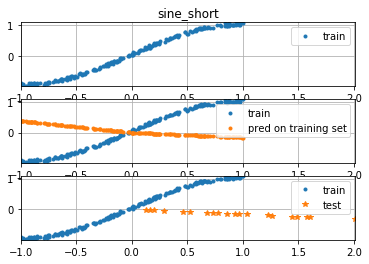

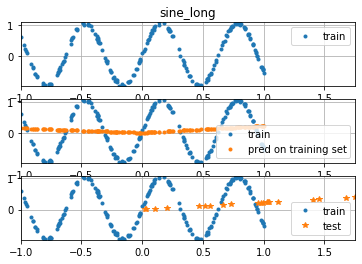

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers          import Dense, Dropout
from keras.models          import Sequential
from keras.optimizers      import RMSprop
from matplotlib            import pyplot as plt
from numpy.random          import random
#from keras.utils import plot_model
#from IPython.display import SVG
#from keras.utils import model_to_dot
from ann_visualizer.visualize import ann_viz

def baseline_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=1))
    #model.add(Dense(64, activation='relu', input_dim=1))
    model.add(Dense( 1, activation='linear'))
    optimizer = RMSprop(0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

def f_lin(x):
    a,b = 1,0.5
    return a*x+b

def f_quad(x):
    a,b,c = 1.,0.5,1.
    return a*pow(x,2.)+b*x+c

def f_circ(x):
    from numpy import sqrt
    r2 = 4
    return sqrt(4-x*x)

def f_sin1(x):
    from numpy import sin, pi
    return sin(pi*x/2.)

def f_sin2(x):
    from numpy import sin
    return sin(10*x)

def natalia(fufu,lab):
    # Regresión de Natalia
    # El argumento fufu es la funcion
    # para generar los 'y's de entrenamiento
    # e.g.  linear, cuadratica, etc

    # Generate dummy data
    ntrain, ntest = 200, 20
    # training
    x_train = random((ntrain, 1))
    scaler  = MinMaxScaler(feature_range=(-1, 1))
    scaler  = scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    y_train = fufu(x_train)+0.1*random((ntrain, 1)) #y_1 = a*x_train+b

    #Testig
    x_test  = .5+random((ntest, 1))
    #scaler  = MinMaxScaler(feature_range=(-1, 1)) # commented to allow extrapolation
    #scaler  = scaler.fit(x_test)
    x_test  = scaler.transform(x_test)
    model1  = baseline_model()
    #plot_model(model1, to_file='model.png')
    ann_viz(model1, title='model')
    model1.fit(x_train, y_train, epochs=40, verbose=0, validation_split=0.3)
    #SVG(model_to_dot(model1).create(prog='dot', format='svg'))

    y       = model1.predict(x_train)
    y_test  = model1.predict(x_test)

    # plotting
    xmin    = min([x_train.min(),x_test.min()])
    xmax    = max([x_train.max(),x_test.max()])
    ymin    = min([y_train.min(),y_test.min(), y.min()])
    ymax    = max([y_train.max(),y_test.max(), y.max()])

    f   = plt.figure()
    ax1 = f.add_subplot(311)
    ax1.set_title(lab)
    ax1.plot(x_train,y_train,'.', label = 'train')
    ax1.set_xlim([xmin,xmax])
    ax1.set_ylim([ymin,ymax])
    ax1.legend()
    ax1.grid()

    ax2 = f.add_subplot(312)
    ax2.plot(x_train,y_train,'.', label='train')
    ax2.plot(x_train, y , '.', label='pred on training set')
    ax2.legend()
    ax2.set_xlim([xmin,xmax])
    ax2.set_ylim([ymin,ymax])
    ax2.legend()
    ax2.grid()

    ax3 = f.add_subplot(313)
    ax3.plot(x_train,y_train,'.', label='train')
    ax3.plot(x_test, y_test , '*', label='test')
    ax3.set_xlim([xmin,xmax])
    ax3.set_xlim([xmin,xmax])
    ax3.set_ylim([ymin,ymax])
    ax3.legend()
    ax3.grid()

    plt.show()
    plt.close()

# Main
funcs = [f_lin,     f_quad,       f_circ,         f_sin1,      f_sin2]
labs  = ['linear', 'quadratic', 'circular arc',  'sine_short',  'sine_long']
for fufu,lab in zip(funcs,labs): natalia(fufu,lab)


